# Machine learning for biology, part one

Task: Predict penguin species from bill and flipper length

Approach: Set a constant threshold for classification

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
df = df.dropna()
df[['flipper_length_mm', 'bill_length_mm', 'species']]

,flipper_length_mm,bill_length_mm,species
0,181.0,39.1,Adelie
1,186.0,39.5,Adelie
2,195.0,40.3,Adelie
4,193.0,36.7,Adelie
5,190.0,39.3,Adelie
...,...,...,...
339,207.0,55.8,Chinstrap
340,202.0,43.5,Chinstrap
341,193.0,49.6,Chinstrap
342,210.0,50.8,Chinstrap


In [4]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

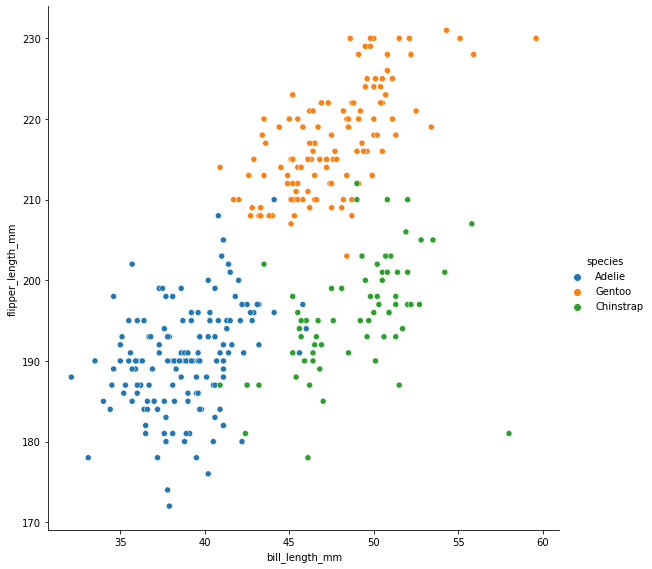

In [6]:
sns.relplot(
    data = df,
    x = 'bill_length_mm',
    y = 'flipper_length_mm',
    hue = 'species',
    height = 8,
    hue_order = ['Adelie', 'Gentoo', 'Chinstrap']
)

In [7]:
def classify_penguin_naive(bill_length, flipper_length):
    if flipper_length > 205:
        return 'Gentoo'
    elif bill_length > 45:
        return 'Chinstrap'
    else:
        return 'Adelie'

In [8]:
naive_predictions = df.apply(lambda x: classify_penguin_naive(x.bill_length_mm, x.flipper_length_mm), axis=1)
naive_predictions

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339       Gentoo
340       Adelie
341    Chinstrap
342       Gentoo
343    Chinstrap
Length: 333, dtype: object

In [10]:
(naive_predictions == df['species']).value_counts()

True     315
False     18
dtype: int64